In [44]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression,Ridge,Lasso
import seaborn as sns

In [30]:
# 生成数据
# 样本量小于特征量 50样本 200个
X=np.random.randn(50,200)
X

array([[ 1.12701336,  0.11711985, -0.43548219, ...,  0.0204523 ,
         0.72586014,  0.25084552],
       [ 0.02155304, -0.62105138,  0.80857184, ...,  0.2952066 ,
         0.63743447,  0.87370848],
       [ 0.24748487,  1.88995818,  1.50679203, ..., -0.4200897 ,
         0.61250852,  1.26663307],
       ...,
       [ 0.03105712, -1.25952136,  0.62222996, ...,  0.508695  ,
        -0.29608834,  1.41471986],
       [ 0.27810712, -0.52684545,  1.38138918, ...,  0.53192016,
        -0.34638799,  0.66617074],
       [ 1.48858346,  1.37152724,  0.11536748, ...,  0.74267931,
        -0.27551731, -0.75902073]])

In [31]:
# Xw=y
w=np.random.randn(200)
# 随机选取190 让其为0
w

array([-1.97600243,  0.54085104, -1.63260185,  0.89227483,  1.47874932,
        2.11392165, -1.12453625,  0.9237661 ,  0.44765736, -0.14573028,
       -0.08297102, -2.40002124, -0.84079357, -0.48091947, -2.30763325,
       -0.69333697, -1.19235333,  1.17912074,  0.17636859,  0.16101986,
        1.00275943, -0.12669961, -0.97634846, -0.57459485, -1.03777514,
        0.91182639,  2.05747086,  0.60663356,  1.22017256,  0.93161089,
        0.29018371, -1.80203964, -1.12110457, -0.18785639, -0.41645053,
        0.20829443,  1.63519972,  0.56599568,  1.66592005,  0.25435402,
       -0.23950129, -0.70966564, -0.16062975,  1.10631159, -0.31207558,
       -0.71306367, -0.1890564 ,  1.41281348,  0.5354255 , -1.87662746,
       -0.83336573, -0.63937562, -1.94076039,  1.31863791,  1.50543482,
        0.78684933, -1.25238023, -0.81709404,  0.72390794, -1.08896418,
       -0.86967605, -1.39793126,  0.5328668 , -1.54824166,  2.96269004,
       -0.22278511,  0.08760107,  1.23953014, -0.32946409, -0.66

In [32]:
index=np.arange(200)
index
np.random.shuffle(index)
index

array([138,  32, 121, 162, 190, 196, 135,  21, 114,  62,  67, 183,   3,
       166, 130, 180,  59,  74, 109,  83, 192, 156, 179, 167, 112, 186,
       181, 119,  54,  51,  64, 197,  90, 187,   4, 105,  42, 129,  39,
       116, 199,  84, 178,  14,  58,  40, 110, 158, 140, 155, 171,  43,
        96,  66, 115,  17,  97,  46, 124,   7, 133,  33,  86,   0,  57,
       144, 152,  52,  60,  36,  89,   5,  20,  27,  10,  19, 174, 128,
       170, 161, 151,  78,  28, 147,  35, 118, 185,  34,  98,  48, 164,
        95,   6, 188, 154, 182, 175, 127, 193,  45,  79, 139,  77,  38,
        94,  93,  70, 120, 157, 153,  91, 168,  26, 146,  80, 176, 169,
        31, 149,   9,  22, 148, 141,  85, 145, 126,  50,  29,  88,  56,
        18,  99, 103,   1, 117, 194,  13,  16, 165,  53, 189,  87,  49,
        23,  25, 159, 137,  24,   8, 198, 101,  55,  82,  72,  11,  75,
       163,  76, 195, 191,  41,  65,  44, 108, 122,  68, 100, 142, 107,
        61, 173, 132,  92, 172, 160, 111, 150, 136,  30,  15, 17

In [33]:
w[index[:190]]=0
w

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.84079357,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.56599568,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.41281348,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.66

In [37]:
# y 是目标值
y=X.dot(w)
y

array([ 1.14704893,  7.65274467, -7.97732813,  4.70645061, -2.19306562,
       -2.7384595 , -2.29957619,  1.3006994 ,  4.88764947,  1.49527941,
        1.21998045,  7.01192904,  4.76645741, -1.36958839, -5.048569  ,
        0.20883151,  2.82095471,  1.71074337,  0.92975394, -4.03268316,
       -2.53093468, -2.01121894,  5.65635444, -2.53545377, -0.39012338,
        1.79390105,  3.87428522, -2.70873589, -1.01475425, -2.96895435,
       -3.89865988,  3.2752295 ,  2.99472814,  0.56057277,  3.60948377,
        0.10638176, -1.41882454, -4.09942624, -0.29577652,  0.11941988,
       -2.0063864 , -3.23923486,  1.46165973, -1.18902791, -1.44621885,
       -6.81496861,  7.32607739,  0.91384107, -2.87231655,  0.63879678])

In [47]:
X.shape

(50, 200)

In [48]:
w

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.84079357,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.56599568,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.41281348,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.66

Text(0.5, 0.98, '线性回归')

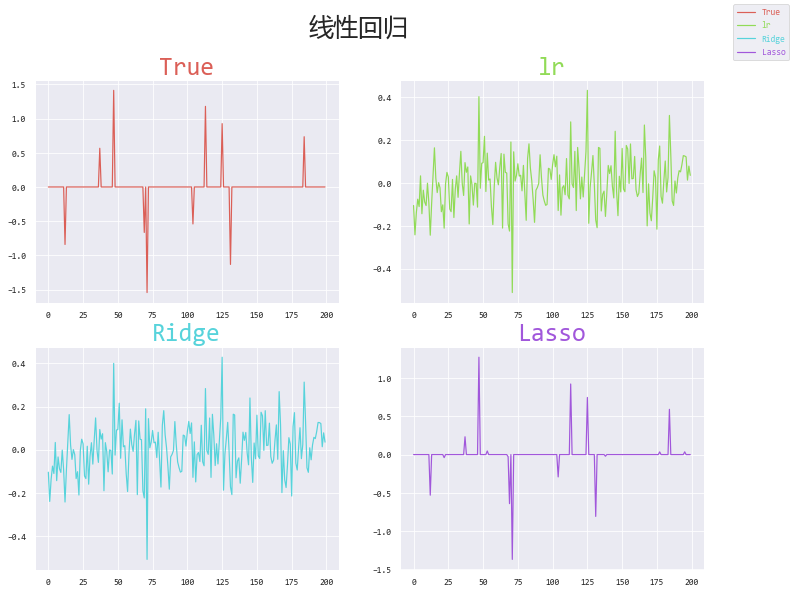

In [102]:
lr=LinearRegression(fit_intercept=False)

ridge=Ridge(alpha=1, fit_intercept=False)

lasso=Lasso(alpha=0.2,fit_intercept=False)

lr.fit(X,y)

ridge.fit(X,y)


lasso.fit(X,y)

lr_w=lr.coef_
ridge_w= ridge.coef_
lasso_w= lasso.coef_




# 4个子视图
sns.set_style(style="darkgrid")
# sns.despine() 
sns.set_context("paper")

plt.figure(figsize=(12,9))

colors=sns.color_palette("hls",4)
ax=plt.subplot(2,2,1)
g=ax.plot(np.arange(200),w,color=colors[0])
ax.set_title("True",fontdict={'fontsize': 25,'color': colors[0]})


ax=plt.subplot(2,2,2)
g=ax.plot(np.arange(200),lr_w,color=colors[1])
ax.set_title("lr",fontdict={'fontsize': 25,'color': colors[1]})


ax=plt.subplot(2,2,3)
g=ax.plot(np.arange(200),ridge_w,color=colors[2])
ax.set_title("Ridge",fontdict={'fontsize': 25,'color': colors[2]})



ax=plt.subplot(2,2,4)
g=ax.plot(np.arange(200),lasso_w,color=colors[3])
ax.set_title("Lasso",fontdict={'fontsize': 25,'color': colors[3]})

from matplotlib import rcParams
rcParams["font.sans-serif"]="Consolas-with-Yahei"
plt.figlegend(["True","lr","Ridge","Lasso"],labelcolor =colors)
plt.suptitle("线性回归",fontsize=25,)